<a href="https://colab.research.google.com/github/DianaTorres-4/Inteligencia-Artificial/blob/main/CNN/Clasificacion_de_ropa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

importaremos los modulos necesarios, en estos codigos podemos observar que utilizaremos tambien para hacer graficos, una matriz de confusion, ver el algoritmo de aprendizaje enre algunas otras caracteristicas mas

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

en esta linea de codigo cargaremos el dataset fashion MNIST

In [ ]:
fashion_mnist.load_data

<function keras.src.datasets.fashion_mnist.load_data()>

nos muetra todo lo que contienen la base de datos

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



Definir una lista con sus clases

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


aqui podemos ver que esta linea de codigo ya nos divide a los conjuntos por defecto

In [ ]:
index = 50000

image = train_images[index]
label = train_labels[index] # Imagen con su respectiva etiqueta

necesitamos primero utilizar el indice de la imagen, la imagen debe de ir  con su respectiva etiqueta

In [ ]:
image.shape

(28, 28)

muestra el tamaño de la matriz en este caso filas y columnas

In [ ]:
print(image)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   0   2   0   1   0
   16  94   0   0   2   1   1   0   1   0]
 [  0   0   0   0   0   0   0   0   0   0   1   0   1   1   0   0   1   0
  101 196 187   8   0   0   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1   0   1   1   0   1   0   0
  161 167 166 112  11   1   0   0   6   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   3   0 121
  213 187 183 180 179 155 147 129 175   8]
 [  0   0   0   0   0   0   0   0   0   0   1   0   0   1   2   

 nos muestra la matriz

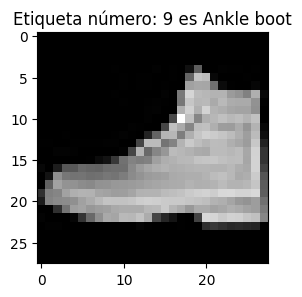

In [ ]:
plt.figure(figsize=(3, 3))
plt.imshow(image, cmap=plt.cm.gray)
plt.title(f'Etiqueta número: {label} es {class_names[label]}')
plt.show()  # valores cercanos a 0 el fondo es negro

podemos ver que los valores cercanos a 0 el fondo es negro

In [ ]:
print(train_images.shape)
print(test_images.shape)


(60000, 28, 28)
(10000, 28, 28)


vamos a ver la longitud del conjunto de entrenamiento de prueba y de entrenamiento

In [ ]:

train_images = train_images / 255.0
test_images = test_images / 255.0


Normalizar las imágenes para que los valores estén en el rango [0, 1] se toma el valor de 0 y 1 se lleva pq la divicion es continua es decir se mantiene en el intervalo. Una lista no funciona, el numero no determina la intensidad del color

In [ ]:
# Crear el modelo de CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10)
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Crearemos el modelo CNN y despues en la segunda linea de codigo tendremos la primera convolucion, la matriz es de 3x3 y el 32 es que va atener 32 convoluciones de forma vertical de ahi hacia abajo son las capas ocultas a excepcion de la ultima linea de codigo esa es nuestra cpara de salida

In [ ]:
# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=adam_optimizer,
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Definiremos cual es nuestra tasa de aprendizaje que esperamos

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - accuracy: 0.4456 - loss: 1.4728 - val_accuracy: 0.7087 - val_loss: 0.7469
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.7349 - loss: 0.6996 - val_accuracy: 0.7497 - val_loss: 0.6582
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.7684 - loss: 0.6183 - val_accuracy: 0.7596 - val_loss: 0.6229
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.7879 - loss: 0.5598 - val_accuracy: 0.7902 - val_loss: 0.5655
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.8074 - loss: 0.5176 - val_accuracy: 0.8129 - val_loss: 0.5149
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.8193 - loss: 0.4867 - val_accuracy: 0.8163 - val_loss: 0.4924
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.8298 - loss: 0.4603 - val_accuracy: 0.8290 - val_loss: 0.4676
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.8363 -

le pediremos a este codigo que nos muestre 10 epocas para ver si el modelo aprende o no

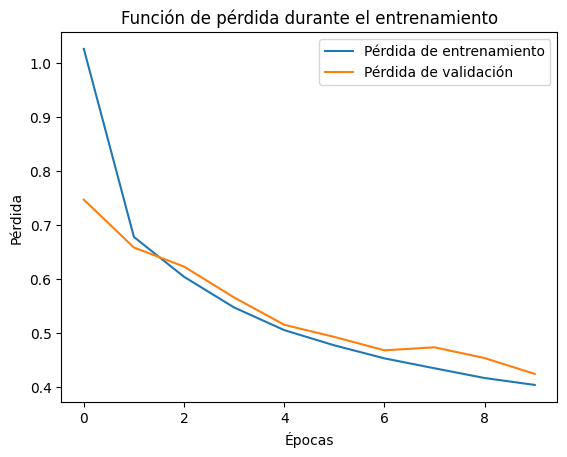

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()


nos muestra la grafica de funcion de perdida y podemos observar y como se ha comentando anteriormente si la grafica tiende a 0 quiere decir que el modelo esta aprendiendo

In [ ]:

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 3s - 9ms/step - accuracy: 0.8473 - loss: 0.4238


Evaluaremos al modelo

In [ ]:
probability_model = Sequential([model, Softmax()])
predictions = probability_model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


hara las predricciones necesarias y pedimos que nos muestexla matriz

In [ ]:
# Calcular matriz de confusión
cm = confusion_matrix(test_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

Clacula la matriz de confusion

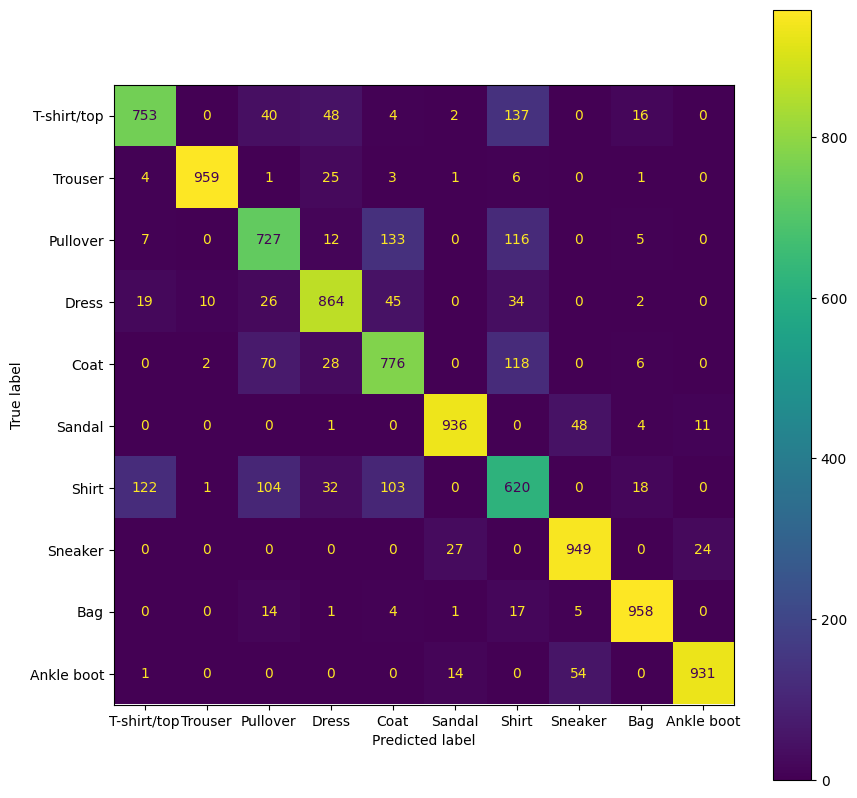

In [ ]:
# Graficar matriz de confusión
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)
plt.show()

Grafica la matriz de confusion

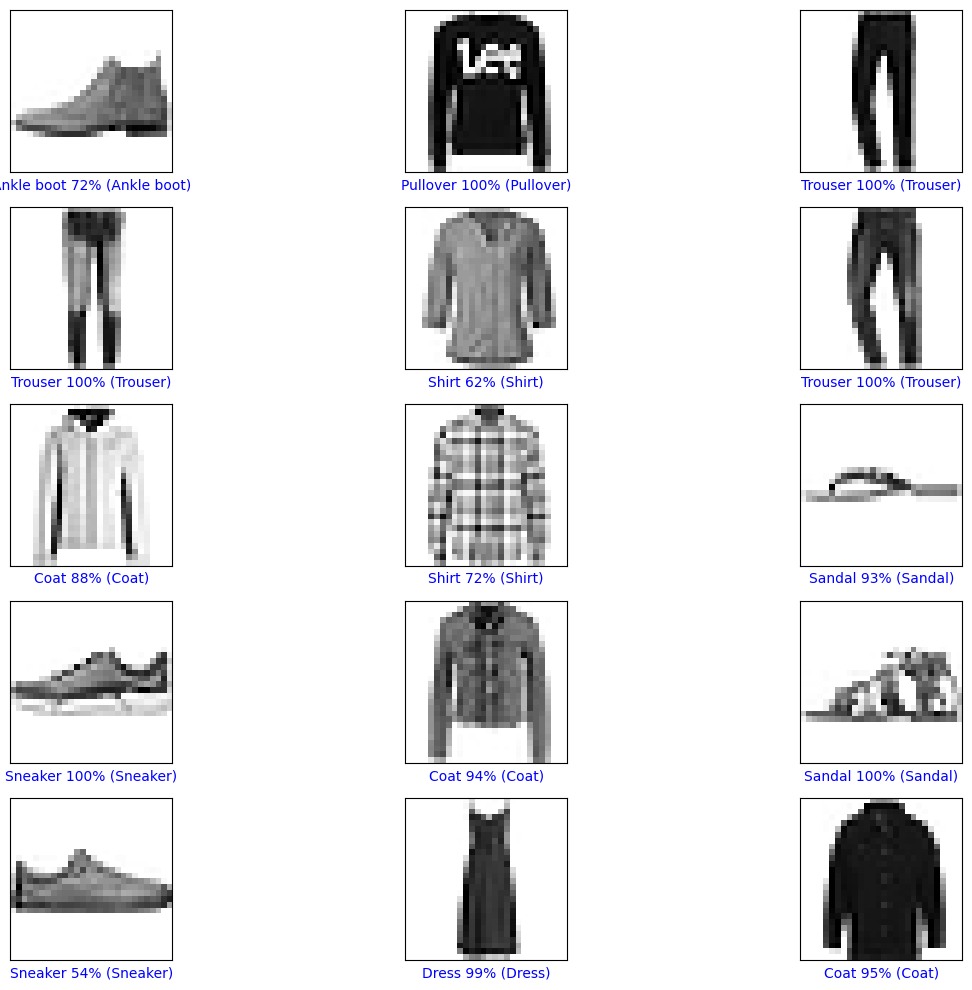

In [ ]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.reshape((28, 28)), cmap=plt.cm.binary)

    predicted_label = tf.argmax(predictions_array).numpy()
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*tf.reduce_max(predictions_array).numpy(),
                                         class_names[true_label]),
                                         color=color)

# Graficar algunas predicciones
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)

plt.tight_layout()
plt.show()

ingresamos varias etiquetas y nos muestra sus respectivas prendas